In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re
import json

import prince
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("archive/cleaned_steam_db_v2.csv")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_17788\3659295105.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("archive/cleaned_steam_db_v2.csv")


,type,name,steam_appid,required_age,is_free,genres,platform_windows,platform_mac,platform_linux,coming_date,...,lang_ru,lang_ar,tool,nsfw,film,release_date_code,initial_price_usd,final_price_usd,memory_gb,storage_gb
0,game,Al-Qadim: The Genie's Curse,1904640.0,0,False,"[1, 3]",True,False,False,2022-03-29,...,False,False,False,False,NaN,3,3.204000,3.204000,0.0,2.0
1,game,Dungeons & Dragons - Stronghold: Kingdom Simul...,1904650.0,0,False,"[28, 2]",True,False,False,2022-03-29,...,False,False,False,False,NaN,3,3.204000,3.204000,0.0,2.0
2,game,Chapel 3-D: The Ascent,1904680.0,0,False,"[1, 23]",True,False,False,NaN,...,False,False,False,False,NaN,0,0.000000,0.000000,1.0,0.0
3,game,VTuber Gallery : Anime Pose,1904690.0,0,True,"[51, 53, 55, 57, 59, 70]",True,False,False,2022-03-21,...,False,False,True,False,NaN,3,0.000000,0.000000,8.0,0.0
4,dlc,Evolution - Alone and Unafraid Trait Pack,1904700.0,0,False,"[28, 2]",True,True,False,2023-08-30,...,False,False,False,False,NaN,1,2.943675,2.943675,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62256,video,The Chair,966800.0,13,False,[80],True,True,True,2018-10-25,...,False,False,False,False,True,4,0.000000,0.000000,1.0,0.0
62257,video,Head,966810.0,13,False,[80],True,True,True,2018-10-25,...,False,False,False,False,True,4,0.000000,0.000000,1.0,0.0
62258,video,The Barn,966820.0,13,False,[80],True,True,True,2018-10-25,...,False,False,False,False,True,4,0.000000,0.000000,1.0,0.0
62259,video,Be My Cat: A Film for Anne,966830.0,13,False,[80],True,True,True,2018-10-25,...,False,False,False,False,True,4,0.000000,0.000000,1.0,0.0


In [3]:
df["genres"] = df["genres"].apply(json.loads)

In [4]:
genre_dict = {}
with open("json_folder/genre_dict_clean.json", "r") as f:
	genre_dict = json.loads(f.read())

In [5]:
some_genre_ids = ['1', '2', '3', '4', '9', '18', '23', '25', '28', '29', '37', '70']
false_table = np.full((df.shape[0], len(some_genre_ids)), False)
false_table = pd.DataFrame(false_table, columns=some_genre_ids)
df = pd.concat([df, false_table], axis=1)
false_table

,1,2,3,4,9,18,23,25,28,29,37,70
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
62256,False,False,False,False,False,False,False,False,False,False,False,False
62257,False,False,False,False,False,False,False,False,False,False,False,False
62258,False,False,False,False,False,False,False,False,False,False,False,False
62259,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
count = 0
for i in range(df.shape[0]):
	for e in df.loc[i, "genres"]:
		if str(e) in some_genre_ids:
			df.loc[i, str(e)] = True
	if count % 10000 == 0:
		print(f"Step {count} done")
	count += 1

df[some_genre_ids]

Step 0 done
Step 10000 done
Step 20000 done
Step 30000 done
Step 40000 done
Step 50000 done
Step 60000 done


,1,2,3,4,9,18,23,25,28,29,37,70
0,True,False,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
62256,False,False,False,False,False,False,False,False,False,False,False,False
62257,False,False,False,False,False,False,False,False,False,False,False,False
62258,False,False,False,False,False,False,False,False,False,False,False,False
62259,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
df["film"].fillna(False, inplace=True)

In [88]:
df.to_csv("archive/cleaned_steam_db_v3.csv")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62261 entries, 0 to 62260
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                62261 non-null  object 
 1   name                62261 non-null  object 
 2   steam_appid         62261 non-null  float64
 3   required_age        62261 non-null  int64  
 4   is_free             62261 non-null  bool   
 5   genres              62261 non-null  object 
 6   platform_windows    62261 non-null  bool   
 7   platform_mac        62261 non-null  bool   
 8   platform_linux      62261 non-null  bool   
 9   coming_date         54512 non-null  object 
 10  package_number      62261 non-null  int64  
 11  discount_percent    62261 non-null  float64
 12  developers_amount   62261 non-null  float64
 13  publishers_amount   62261 non-null  int64  
 14  single              62261 non-null  bool   
 15  multi               62261 non-null  bool   
 16  supp

In [7]:
df[some_genre_ids].sum()

1     25622
2     12801
3     12591
4     22028
9      2276
18     2678
23    39822
25    22228
28    12935
29     1770
37     5124
70     5025
dtype: int64

In [8]:
X_genre = df[some_genre_ids]

In [9]:
mca_genre = prince.MCA(n_components=4)
mca_genre.fit(X_genre)
df[["eigen_vec_1", "eigen_vec_2", "eigen_vec_3", "eigen_vec_4"]] = mca_genre.transform(X_genre)

<Axes: xlabel='eigen_vec_1', ylabel='eigen_vec_2'>

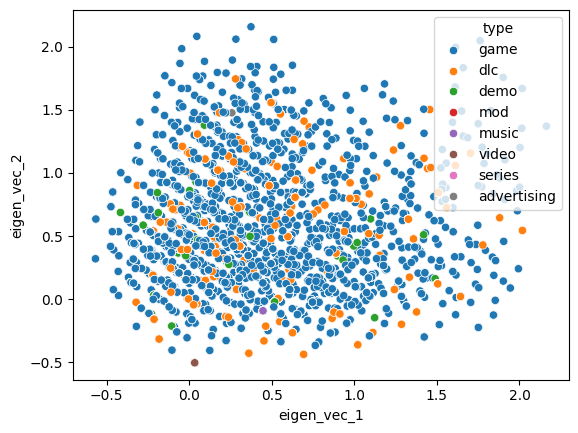

In [10]:
sns.scatterplot(df, x="eigen_vec_1", y="eigen_vec_2", hue="type")

In [11]:
col_mc_a = mca_genre.column_coordinates(X_genre)
col_mc_a = col_mc_a.loc[col_mc_a.index.str.contains("True"), :]
col_mc_a["genre"] = col_mc_a.index
col_mc_a["genre"] = col_mc_a["genre"].apply(lambda x: genre_dict[re.findall(r"\d+", x)[0]])

fig = px.scatter(
	x=col_mc_a[0].to_numpy(),
	y=col_mc_a[1].to_numpy(),
	size=(col_mc_a[2] - col_mc_a[2].min()).to_numpy(),
	color=col_mc_a[3].to_numpy(),
	text=col_mc_a["genre"],
	labels={
		"x": "First Eigen Vector",
		"y": "Second Eigen Vector",
		"color": "Fourth Eigen Vector"
	})
fig.show(renderer='browser')

In [12]:
df.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free', 'genres',
       'platform_windows', 'platform_mac', 'platform_linux', 'coming_date',
       'package_number', 'discount_percent', 'developers_amount',
       'publishers_amount', 'single', 'multi', 'support_vr',
       'support_controller', 'lang_en', 'lang_fr', 'lang_de', 'lang_es',
       'lang_po', 'lang_zh', 'lang_ja', 'lang_ko', 'lang_it', 'lang_ru',
       'lang_ar', 'tool', 'nsfw', 'film', 'release_date_code',
       'initial_price_usd', 'final_price_usd', 'memory_gb', 'storage_gb', '1',
       '2', '3', '4', '9', '18', '23', '25', '28', '29', '37', '70',
       'eigen_vec_1', 'eigen_vec_2', 'eigen_vec_3', 'eigen_vec_4'],
      dtype='object')

In [13]:
temp = df[(df["initial_price_usd"] != 0) & (df["final_price_usd"] < 20)]

fig = px.scatter(
	x=temp["eigen_vec_1"].to_numpy(),
	y=temp["eigen_vec_2"].to_numpy(),
	size=(temp["eigen_vec_3"] - temp["eigen_vec_3"].min()).to_numpy(),
	color=temp["final_price_usd"],
		labels={
		"x": "First Eigen Vector",
		"y": "Second Eigen Vector"
	})
fig.show(renderer='browser')

In [14]:
X_lang = df.loc[:, df.columns.str.contains("lang")]
X_lang

,lang_en,lang_fr,lang_de,lang_es,lang_po,lang_zh,lang_ja,lang_ko,lang_it,lang_ru,lang_ar
0,True,True,True,True,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,False
2,True,True,True,True,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
62256,True,False,False,False,False,False,False,False,False,False,False
62257,True,False,False,False,False,False,False,False,False,False,False
62258,True,False,False,False,False,False,False,False,False,False,False
62259,True,False,False,False,False,False,False,False,False,False,False


In [15]:
mca_lang = prince.MCA(n_components=4)
mca_lang.fit(X_lang)
y = mca_lang.transform(X_lang)
y

,0,1,2,3
0,0.223577,-0.451258,-0.400683,0.046235
1,-0.020566,-0.336351,-0.251626,0.031318
2,0.479249,-0.494034,-0.382005,0.178244
3,-0.499560,-0.083091,0.074955,0.021047
4,-0.499560,-0.083091,0.074955,0.021047
...,...,...,...,...
62256,-0.499560,-0.083091,0.074955,0.021047
62257,-0.499560,-0.083091,0.074955,0.021047
62258,-0.499560,-0.083091,0.074955,0.021047
62259,-0.499560,-0.083091,0.074955,0.021047


In [16]:
mca_lang.column_coordinates(X_lang)

,0,1,2,3
lang_en_False,-0.456171,3.556168,-2.296059,1.546684
lang_en_True,0.021690,-0.169088,0.109172,-0.073541
lang_fr_False,-0.530349,0.122472,0.131831,-0.000810
lang_fr_True,1.440173,-0.332575,-0.357991,0.002199
lang_de_False,-0.532160,0.131073,0.142595,-0.007095
lang_de_True,1.411457,-0.347647,-0.378207,0.018818
lang_es_False,-0.525475,0.111589,0.121493,-0.011062
lang_es_True,1.469561,-0.312073,-0.339772,0.030937
lang_po_False,-0.377709,0.028513,-0.010449,-0.067197
lang_po_True,1.711538,-0.129203,0.047350,0.304494


In [17]:
col_mc_a

,0,1,2,3,genre
1_True,-0.350027,0.240844,0.784924,0.098973,Action
2_True,0.350345,0.695319,-1.193097,-0.075512,Strategy
3_True,-0.480128,0.947550,-0.610764,0.401963,RPG
4_True,0.254871,0.258195,-0.102282,-0.842443,Casual
9_True,2.744054,0.262801,2.275320,-0.426285,Racing
18_True,3.016980,0.538128,1.569958,-0.471385,Sports
23_True,-0.168574,0.359884,0.060160,-0.458071,Indie
25_True,-0.598018,0.493541,0.260787,-0.246272,Adventure
28_True,1.121472,0.244503,-0.444533,-0.251699,Simulation
29_True,1.119210,3.046026,0.554929,2.940042,Massively Multiplayer


In [18]:
re.findall(r"(lang_\w+)_True", "lang_en_True")[0]

'lang_en'

In [19]:
col_mc_a = mca_lang.column_coordinates(X_lang)
col_mc_a = col_mc_a.loc[col_mc_a.index.str.contains("True"), :]
col_mc_a["lang"] = col_mc_a.index
col_mc_a["lang"] = col_mc_a["lang"].apply(lambda x: re.findall(r"(lang_\w+)_True", x)[0])

fig = px.scatter(
	x=col_mc_a[0].to_numpy(),
	y=col_mc_a[1].to_numpy(),
	size=(col_mc_a[2] - col_mc_a[2].min()).to_numpy(),
	color=col_mc_a[3].to_numpy(),
	text=col_mc_a.index,
	labels={
		"x": "First Eigen Vector",
		"y": "Second Eigen Vector",
		"color": "Fourth Eigen Vector"
	})
fig.show(renderer='browser')

In [20]:
temp = df[(df["initial_price_usd"] != 0) & (df["final_price_usd"] < 20)]

fig = px.scatter(
	x=temp["eigen_vec_1"].to_numpy(),
	y=temp["eigen_vec_2"].to_numpy(),
	size=(temp["eigen_vec_3"] - temp["eigen_vec_3"].min()).to_numpy(),
	color=temp["type"],
		labels={
		"x": "First Eigen Vector",
		"y": "Second Eigen Vector"
	})
fig.show(renderer='browser')

In [21]:
from gensim.models import Word2Vec

In [22]:
genre_sentences = df["genres"].apply(lambda x: " ".join(str(e) for e in x))

In [23]:
w2v_model = Word2Vec()
w2v_model.build_vocab(df["genres"])

In [24]:
w2v_model.train(df["genres"], total_examples=df.shape[0], epochs=30)

(657478, 5049360)

In [25]:
w2v_model.init_sims(replace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17788\514372312.py:1: DeprecationWarning:

Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).



In [26]:
w2v_model.wv[3].mean()

-0.011264822

In [27]:
w2v_model.wv.most_similar(positive=[25, 9])

[(2, 0.6058504581451416),
 (29, 0.4739018380641937),
 (37, 0.4598091244697571),
 (72, 0.3574838638305664),
 (3, 0.34286820888519287),
 (70, 0.3337104916572571),
 (23, 0.3283366560935974),
 (18, 0.3217272162437439),
 (4, 0.3028351664543152),
 (50, 0.2789682149887085)]

In [28]:
w2v_model.wv.key_to_index

{23: 0,
 1: 1,
 25: 2,
 4: 3,
 28: 4,
 2: 5,
 3: 6,
 37: 7,
 70: 8,
 18: 9,
 9: 10,
 29: 11,
 57: 12,
 53: 13,
 51: 14,
 54: 15,
 73: 16,
 56: 17,
 58: 18,
 60: 19,
 52: 20,
 74: 21,
 59: 22,
 55: 23,
 71: 24,
 72: 25,
 80: 26,
 81: 27,
 50: 28,
 83: 29}

In [29]:
w2v_model.wv.similarity([25, 9], 29)

array([0.3135625 , 0.23878193], dtype=float32)

In [30]:
def tsnescatterplot(model, word, list_names):
	""" Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
	its list of most similar words, and a list of words.
	"""
	arrays = np.empty((0, 100), dtype='f')
	word_labels = [word]
	color_list  = ['red']

	# adds the vector of the query word
	arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
	
	# gets list of most similar words
	close_words = model.wv.most_similar([word])
	
	# adds the vector for each of the closest words to the array
	for wrd_score in close_words:
		wrd_vector = model.wv.__getitem__([wrd_score[0]])
		word_labels.append(wrd_score[0])
		color_list.append('blue')
		arrays = np.append(arrays, wrd_vector, axis=0)
	
	# adds the vector for each of the words from list_names to the array
	for wrd in list_names:
		wrd_vector = model.wv.__getitem__([wrd])
		word_labels.append(wrd)
		color_list.append('green')
		arrays = np.append(arrays, wrd_vector, axis=0)
		
	# Reduces the dimensionality from 300 to 50 dimensions with PCA
	reduc = PCA(n_components=4).fit_transform(arrays)
	
	# Finds t-SNE coordinates for 2 dimensions
	np.set_printoptions(suppress=True)

	Y = TSNE(n_components=2, random_state=0, perplexity=min(15, arrays.shape[0] - 1)).fit_transform(reduc)
	
	# Sets everything up to plot
	pca_df = pd.DataFrame({'x': [x for x in Y[:, 0]],
					   	   'y': [y for y in Y[:, 1]],
					   	   'words': word_labels,
					   	   'color': color_list})

	fig, _ = plt.subplots()
	fig.set_size_inches(9, 9)
	
	# Basic plot
	p1 = sns.regplot(data=pca_df,
					 x="x",
					 y="y",
					 fit_reg=False,
					 marker="o",
					 scatter_kws={'s': 40,
								  'facecolors': pca_df['color']
								 }
					)
	
	# Adds annotations one by one with a loop
	for line in range(0, pca_df.shape[0]):
		p1.text(pca_df["x"][line],
				 pca_df['y'][line],
				 '  ' + genre_dict[ str(pca_df["words"][line]) ],
				 horizontalalignment='left',
				 verticalalignment='bottom', size='medium',
				 color=pca_df['color'][line],
				 weight='normal').set_size(15)
	
	plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
	plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
			
	plt.title('t-SNE visualization for {}'.format(genre_dict[str(word)]))
	

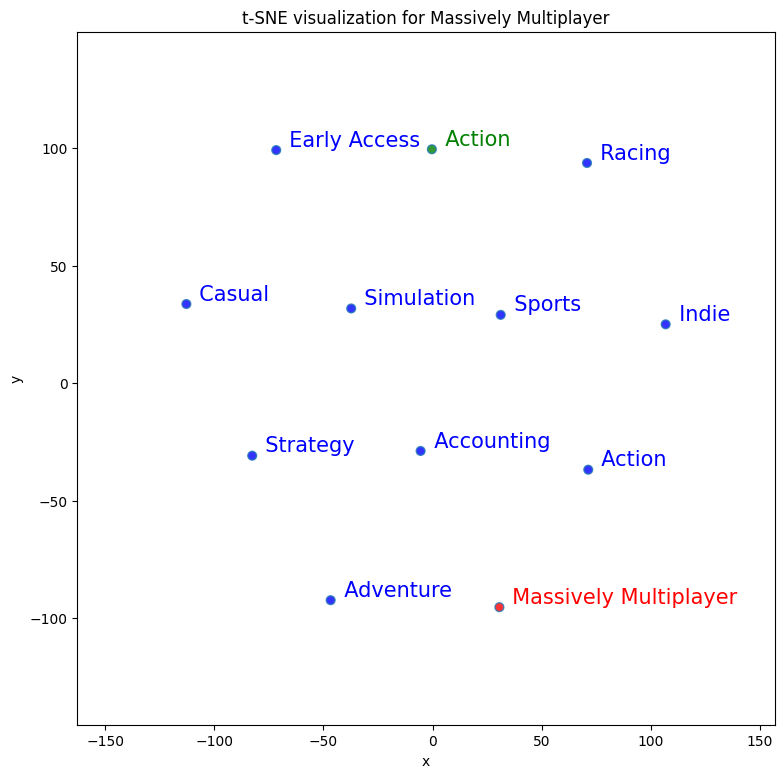

In [31]:
tsnescatterplot(w2v_model, 29, [1])

In [32]:
w2v_model.wv.__getitem__([25]).shape

(1, 100)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62261 entries, 0 to 62260
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                62261 non-null  object 
 1   name                62261 non-null  object 
 2   steam_appid         62261 non-null  float64
 3   required_age        62261 non-null  int64  
 4   is_free             62261 non-null  bool   
 5   genres              62261 non-null  object 
 6   platform_windows    62261 non-null  bool   
 7   platform_mac        62261 non-null  bool   
 8   platform_linux      62261 non-null  bool   
 9   coming_date         54512 non-null  object 
 10  package_number      62261 non-null  int64  
 11  discount_percent    62261 non-null  float64
 12  developers_amount   62261 non-null  float64
 13  publishers_amount   62261 non-null  int64  
 14  single              62261 non-null  bool   
 15  multi               62261 non-null  bool   
 16  supp

In [34]:
df = df.reset_index(drop=True)

In [35]:
def get_numeric_arr(columns):
	bool_cols = np.full((columns.shape), False)
	for i in range(columns.shape[0]):
		if columns[i].isnumeric():
			bool_cols[i] = True
	return bool_cols

get_numeric_arr(df.columns)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False])

In [36]:
rows = ['1', '2', '3', '4', '9', '18', '23', '25', '28', '29', '37', '70']

In [37]:
df_work = df.copy()

In [73]:
tf_table = df_work[rows].to_numpy().astype(float)
idf_table = df_work[rows].to_numpy().astype(float)

In [74]:
sum_col = tf_table.sum(axis=1)

for i in range(df.shape[0]):
	for j in range(len(rows)):
		if sum_col[i] > 0:
			tf_table[i, j] /= sum_col[i]

tf_table

array([[0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ]])

In [78]:
sum_row = tf_table.sum(axis=0)

for i in range(df.shape[0]):
	for j in range(len(rows)):
		if sum_row[j] > 0:
			idf_table[i, j] = np.log(df.shape[0] / sum_row[j])

idf_table

array([[1.81381717, 2.6514997 , 2.67425002, ..., 5.00725021, 3.70842959,
        3.77637339],
       [1.81381717, 2.6514997 , 2.67425002, ..., 5.00725021, 3.70842959,
        3.77637339],
       [1.81381717, 2.6514997 , 2.67425002, ..., 5.00725021, 3.70842959,
        3.77637339],
       ...,
       [1.81381717, 2.6514997 , 2.67425002, ..., 5.00725021, 3.70842959,
        3.77637339],
       [1.81381717, 2.6514997 , 2.67425002, ..., 5.00725021, 3.70842959,
        3.77637339],
       [1.81381717, 2.6514997 , 2.67425002, ..., 5.00725021, 3.70842959,
        3.77637339]])

In [81]:
df_work[rows] = tf_table * idf_table

<Axes: >

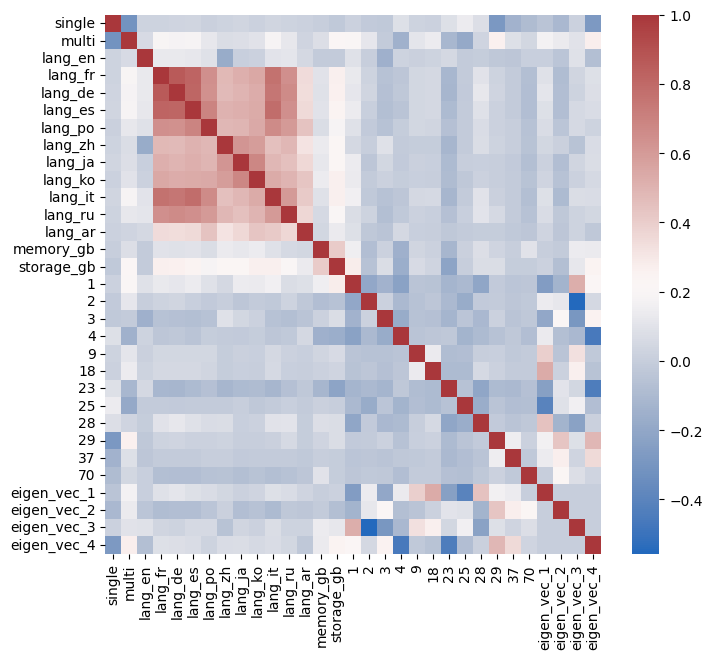

In [82]:
plt.figure(figsize=(8, 7))
sns.heatmap(df_work.iloc[:, 
					df.columns.str.contains("lang") |
					df.columns.str.contains("eigen_vec") |
					(df.columns == "single") |
					(df.columns == "multi") |
					df.columns.str.contains("gb") |
					get_numeric_arr(df.columns)].astype(float).corr(), cmap="vlag")

https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial